<a href="https://colab.research.google.com/github/Khasnuwr/Brain-Tumor-Dataset/blob/main/Brain_Tumor_Segmentation_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Get Dataset
!git clone https://github.com/Khasnuwr/Brain-Tumor-Dataset/

Cloning into 'Brain-Tumor-Dataset'...
remote: Enumerating objects: 3006, done.
remote: Total 3006 (delta 0), reused 0 (delta 0), pack-reused 3006
Receiving objects: 100% (3006/3006), 124.75 MiB | 24.42 MiB/s, done.


In [7]:
import tensorflow as tf
import os

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices('GPU')

[]

In [10]:
import cv2
import imghdr

In [11]:
data_dir = '/content/Brain-Tumor-Dataset/data'

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/Brain-Tumor-Dataset/data/yes/y1308.jpg
Image not in ext list /content/Brain-Tumor-Dataset/data/no/no392.jpg


In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('/content/Brain-Tumor-Dataset/data')

Found 2998 files belonging to 2 classes.


In [17]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
data_iterator

In [35]:
batch = data_iterator.next()

In [34]:
# Image representeed as numpy array
batch[0].shape

(32, 256, 256, 3)

In [36]:
# Class 0 = No Tumor
# Class 1 = Tumor
batch[1]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

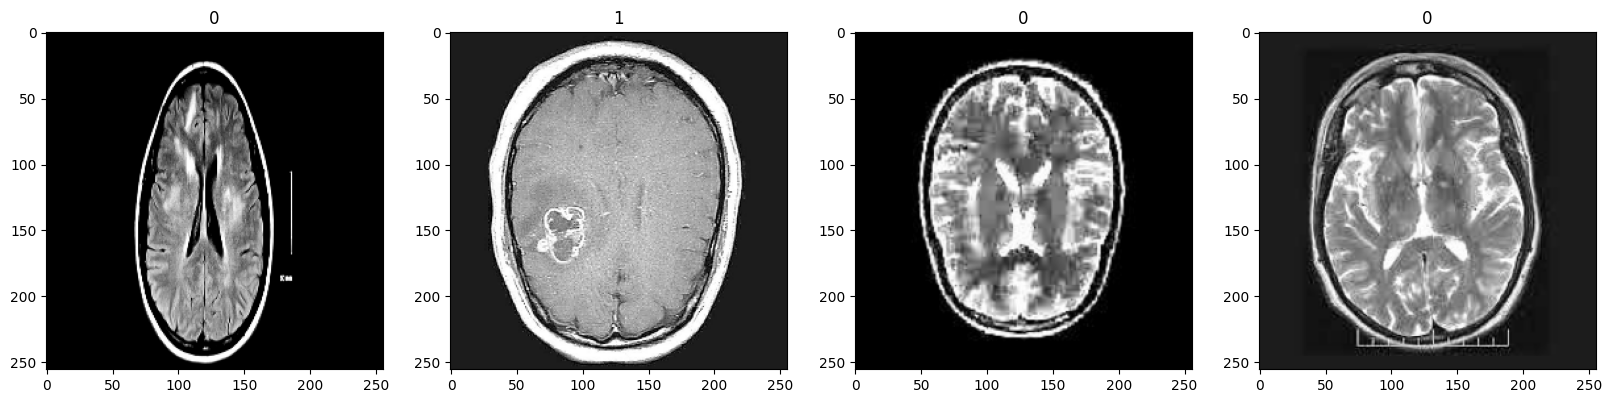

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [38]:
data = data.map(lambda x,y: (x/255, y))

In [39]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [40]:
len(data)

94

In [41]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = len(data) - train_size - val_size

In [42]:
train_size, val_size, test_size

(65, 18, 11)

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [45]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
65/65 [==============================] - 129s 2s/step - loss: 0.4620 - accuracy: 0.7909 - val_loss: 0.3221 - val_accuracy: 0.8646
Epoch 2/20
65/65 [==============================] - 124s 2s/step - loss: 0.2259 - accuracy: 0.9159 - val_loss: 0.2331 - val_accuracy: 0.9167
Epoch 3/20
65/65 [==============================] - 125s 2s/step - loss: 0.1150 - accuracy: 0.9611 - val_loss: 0.1115 - val_accuracy: 0.9670
Epoch 4/20
65/65 [==============================] - 122s 2s/step - loss: 0.0644 - accuracy: 0.9817 - val_loss: 0.1181 - val_accuracy: 0.9566
Epoch 5/20
65/65 [==============================] - 124s 2s/step - loss: 0.0279 - accuracy: 0.9933 - val_loss: 0.1204 - val_accuracy: 0.9740
Epoch 6/20
65/65 [==============================] - 125s 2s/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.0706 - val_accuracy: 0.9792
Epoch 7/20
65/65 [==============================] - 125s 2s/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0550 - val_accuracy: 0.9774
Epoch 8/20
65

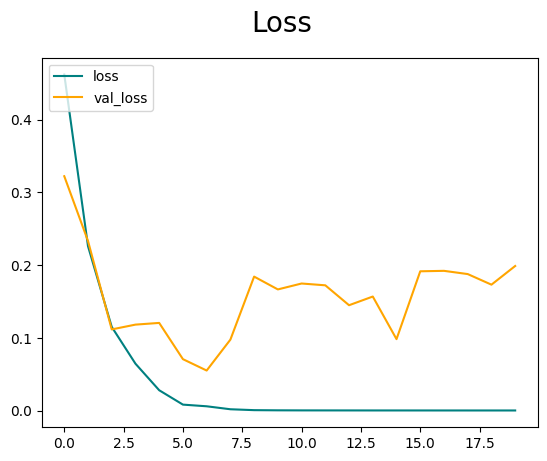

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

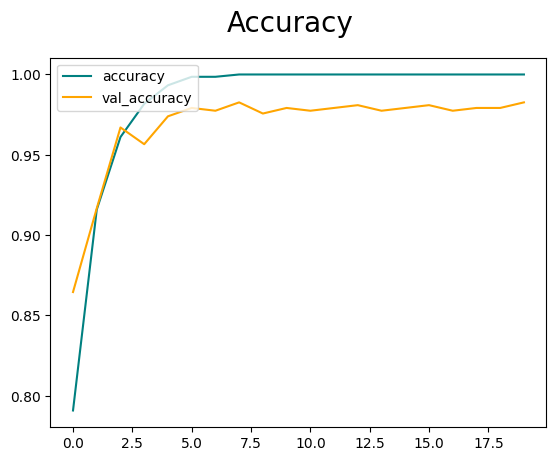

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

11/11 [==============================] - 13s 423ms/step


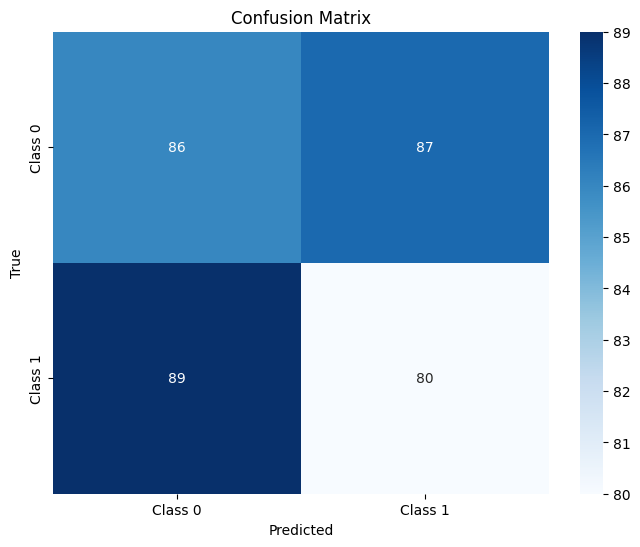


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       173
           1       0.48      0.47      0.48       169

    accuracy                           0.49       342
   macro avg       0.49      0.49      0.49       342
weighted avg       0.49      0.49      0.49       342



In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Evaluate the model on the test set
test_predictions = model.predict(test)
test_predictions = np.round(test_predictions).astype(int)
test_labels = np.concatenate([y for x, y in test], axis=0)

# Calculate confusion matrix
conf_mat = confusion_matrix(test_labels, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions))


In [67]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalCrossentropy, BinaryAccuracy

In [68]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [69]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 378ms/step


In [70]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95953757, shape=(), dtype=float32) tf.Tensor(0.9431818, shape=(), dtype=float32) tf.Tensor(0.9502924, shape=(), dtype=float32)


In [71]:
import cv2

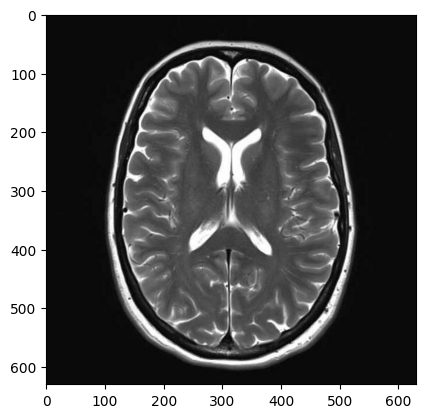

In [110]:
img = cv2.imread('/content/Brain-Tumor-Dataset/data/no/no1063.jpg')
plt.imshow(img)
plt.show()

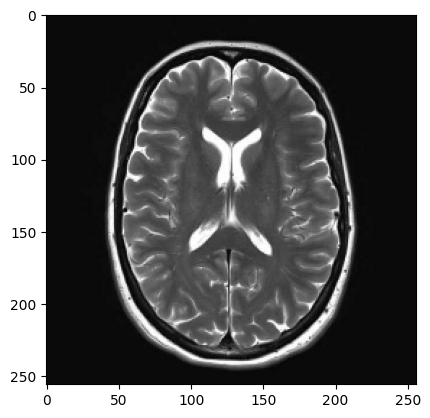

In [111]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [112]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 55ms/step


In [113]:
yhat

array([[1.1142355e-17]], dtype=float32)

In [114]:
if yhat > 0.5:
    print(f'Predicted class is a Tumor')
else:
    print(f'Predicted class is Not a Tumor')

Predicted class is Not a Tumor


In [97]:
from tensorflow.keras.models import load_model

In [98]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('models/imageclassifier.h5')

In [ ]:
xjat = new_model.predict(np.expand_dims(resize/255, 0))